# Анализ убытков приложения ProcrastinatePRO+

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.


# Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Загружаем данные и подготавливаем их к анализу
Загружаем данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа.

Путь к файлам:
 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

#Открытие файлов
visits = pd.read_csv('datasets/visits_info_short.csv')
orders = pd.read_csv('datasets/orders_info_short.csv')
costs = pd.read_csv('datasets/costs_info_short.csv')

#Смотрим общую информацию
for data in [visits, orders, costs]:
    display(data.head())
    print('Общая информация:')
    print(data.info())
    print()
    print('Количество пропуков:')
    print(round((data.isna().mean()*100),2))
    print()
    print('Количество дубликатов:', data.duplicated().sum())
    print()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Количество пропуков:
User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

Количество дубликатов: 0



User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Количество пропуков:
User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64

Количество дубликатов: 0



dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Количество пропуков:
dt         0.0
Channel    0.0
costs      0.0
dtype: float64

Количество дубликатов: 0



In [2]:
# Приводим названия столбцов к нужному виду
for data in [visits, orders, costs]:
    data.columns = data.columns.str.lower().str.replace('\s+','_', regex=True)
    print(data.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


In [3]:
# Приводим колоники к нужному типу данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Пропусков и дубликатов в данных не оказалось, привели названия столбцов к нижнему регистру и столбцы с временем к типу datetime.

## Задаем функции для расчета и анализа LTV, ROI, удержания и конверсии

Функция создания профилей:

In [4]:
def get_profiles(visits, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверьте, есть ли ID пользователей из profiles в orders
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция расчета удержания:

In [5]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция расчета конверсии:

In [6]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция расчета LTV и ROI:

In [7]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция для сглаживания фрейма:

In [8]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Функция для визуализации удержания:

In [9]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция для визуализации конверсии:

In [10]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функция для визуализации LTV и ROI:

In [11]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

Построем профили пользователей. Определилим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [12]:
# Создаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [13]:
# Минимальная дата привлечения пользователей
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [14]:
# Максимальная дата привлечения пользователей
profiles['dt'].max()

datetime.date(2019, 10, 27)

Минимальная и максимальная даты привлечения пользователей совпадают с датами в техническом задании.

In [15]:
# Страны из которых приходят посетители и доля платящих пользователей
display(profiles.groupby('region')
        .agg({'user_id': 'nunique', 'payer': 'mean'})
        .sort_values(by = 'payer', ascending = False))

user_id     payer
region                          
United States   100002  0.069019
Germany          14981  0.041119
UK               17575  0.039829
France           17450  0.037994

Приложением пользуются жители США, Великобритании, Франции и Германии. Больше всего платящих пользователей приходится на США.

In [16]:
# Девайсы которыми пользуются посетители и доля платящих пользователей
display(profiles.groupby('device')
        .agg({'user_id': 'nunique', 'payer': 'mean'})
        .sort_values(by = 'payer', ascending = False))

user_id     payer
device                    
Mac        30042  0.063644
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468

Пользователи заходят в приложение с iPhone, Android, PC и Mac. Среди владельцев iPhone и Mac больше всего платящих пользователей.

In [17]:
# Источники привлечения пользователей и доля платящих пользователей
display(profiles.groupby('channel')
        .agg({'user_id': 'nunique', 'payer': 'mean'})
        .sort_values(by = 'payer', ascending = False))

user_id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553

Привлечение пользователей шло по 10 каналам. Самыми крупными являются FaceBoom и TipTop. Больше всего платящих пользователей приносят FaceBoom, AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds. Если FaceBoom и TipTop являются самыми крупными каналами, то AdNonSense, lambdaMediaAds и RocketSuperAds имеют малую долю от общего числа привлеченных пользователей и возможно стоит увеличивать привлечение пользователей именно по этим каналам.

## Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [18]:
# Общие траты на маркетинг
costs['costs'].sum()

105497.30000000002

In [19]:
# Траты на каждый источник
display(costs.groupby('channel')
        .agg({'costs': 'sum'})
        .sort_values(by = 'costs', ascending = False))

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

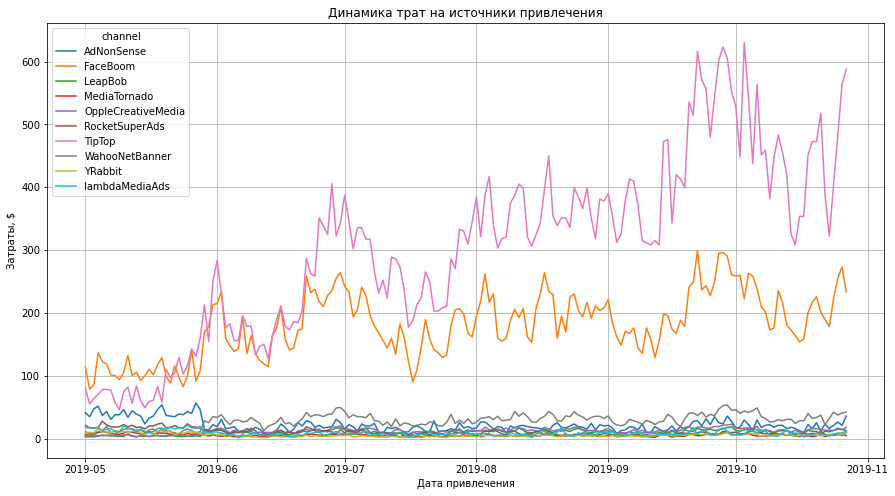

In [20]:
# Траты на каждый источник по времени
costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('Затраты, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика трат на источники привлечения')
plt.show()

Всего на маркетинг было потрачено 105497,3$. Основные траты (порядка 82%) приходятся на TipTop и FaceBoom.

In [21]:
# Средняя соимость привлечения одного пользователя источником
display(profiles.groupby('channel')
        .agg({'acquisition_cost': 'mean'})
        .sort_values(by = 'acquisition_cost', ascending = False))

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

In [22]:
# Сдерний CAC на одного пользователя для всего проекта исключая organic
profiles[profiles['channel'] != 'organic']['acquisition_cost'].mean()

1.127481323942928

TipTop имеет самую высокую стоимость привлечения одного пользователя. Средняя соимость привлечения одного пользователя FaceBoom близка к среднему значению всего проекта.

## Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишим проблемы, которые обнаружили. Ответем на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишим возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считаем, что смотрим данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Анализ общей окупаемости рекламы

Исключаем из анализа окупаемости рекламы органических пользователей так как на привлечения их не тратятся деньги.

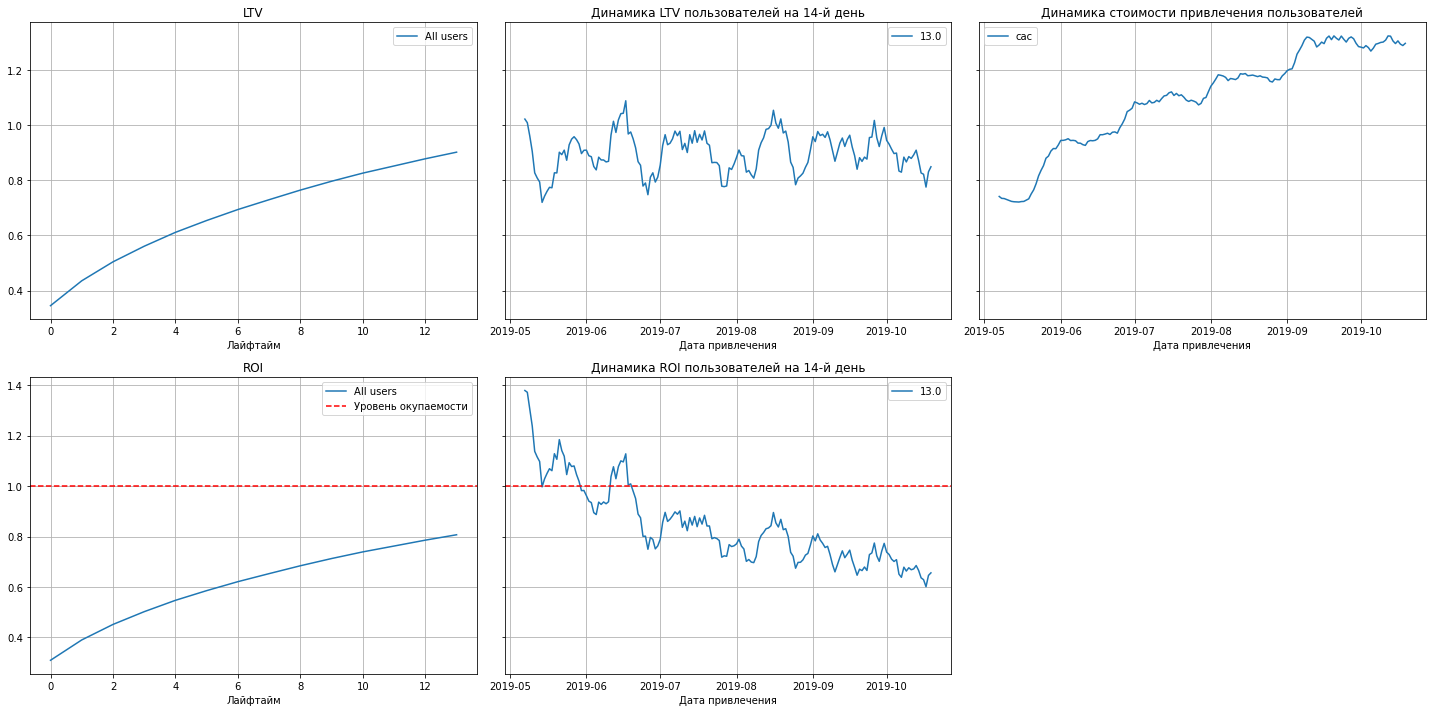

In [23]:
# Исключаем из анализа органических пользователей
profiles1 = profiles[profiles['channel'] != 'organic']

# Задаем момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

# Считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles1, orders, observation_date, horizon_days)

# Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days) 

Из графиков следует, что:
* Реклама не окупается. ROI после двух недель на отметке около 63%.
* Стоимость привлечения одного клиента  постоянно растет.
* LTV достаточно стабилен.

### Анализ окупаемости рекламы с разбивкой по устройствам

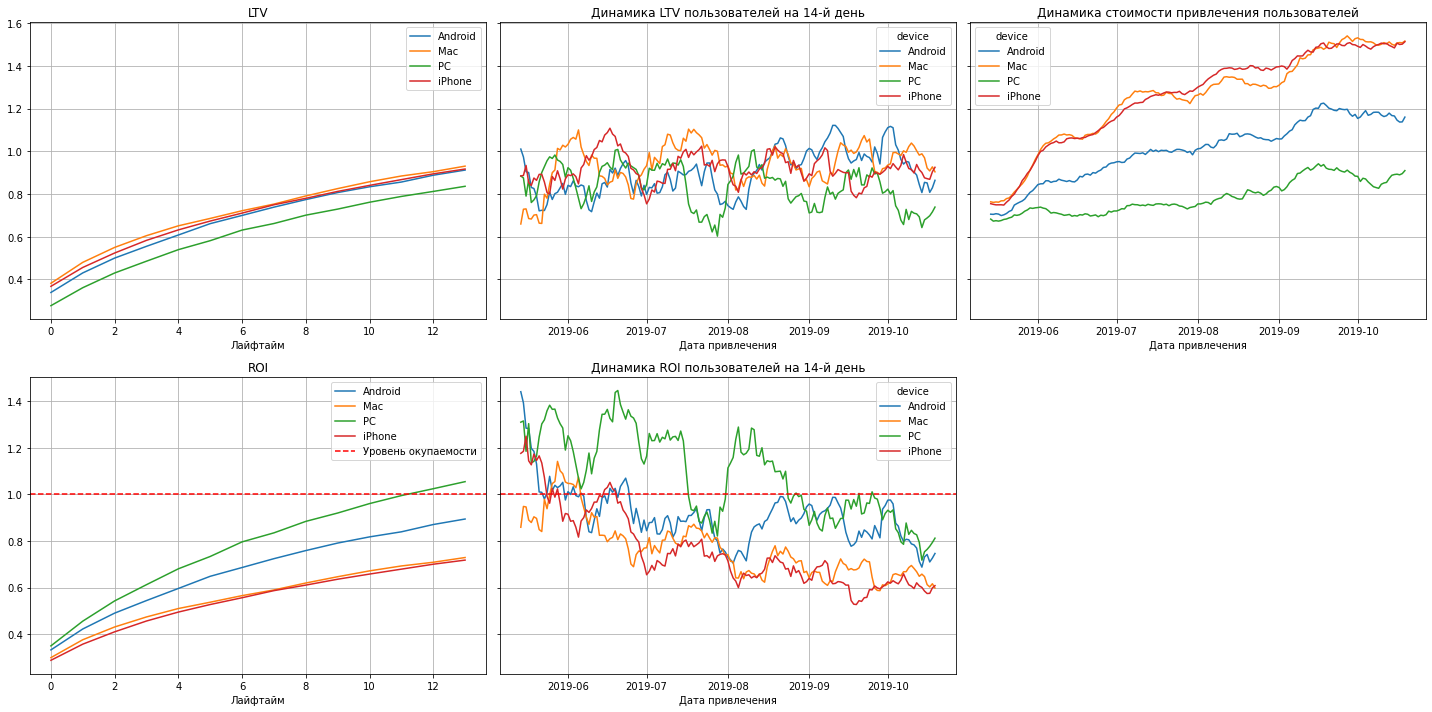

In [24]:
# Задаем условие разбивки
dimensions = ['device']

# Считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

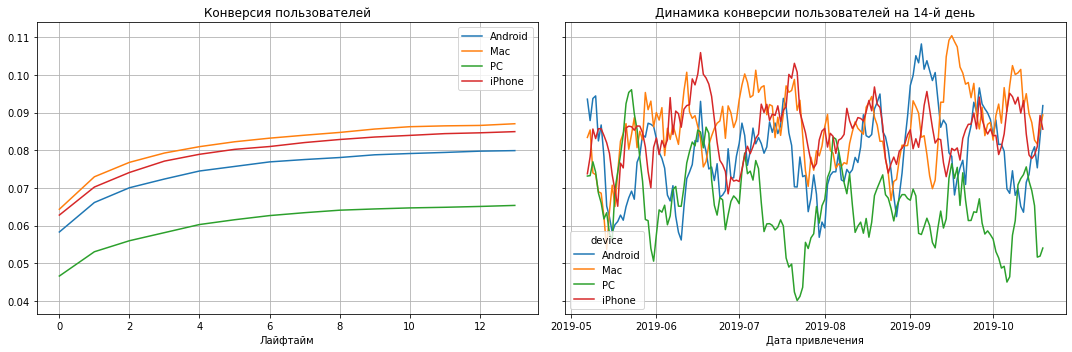

In [25]:
# Счиаем конферсию
conversion_raw, conversion, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_conversion(conversion, conversion_history, horizon_days) 

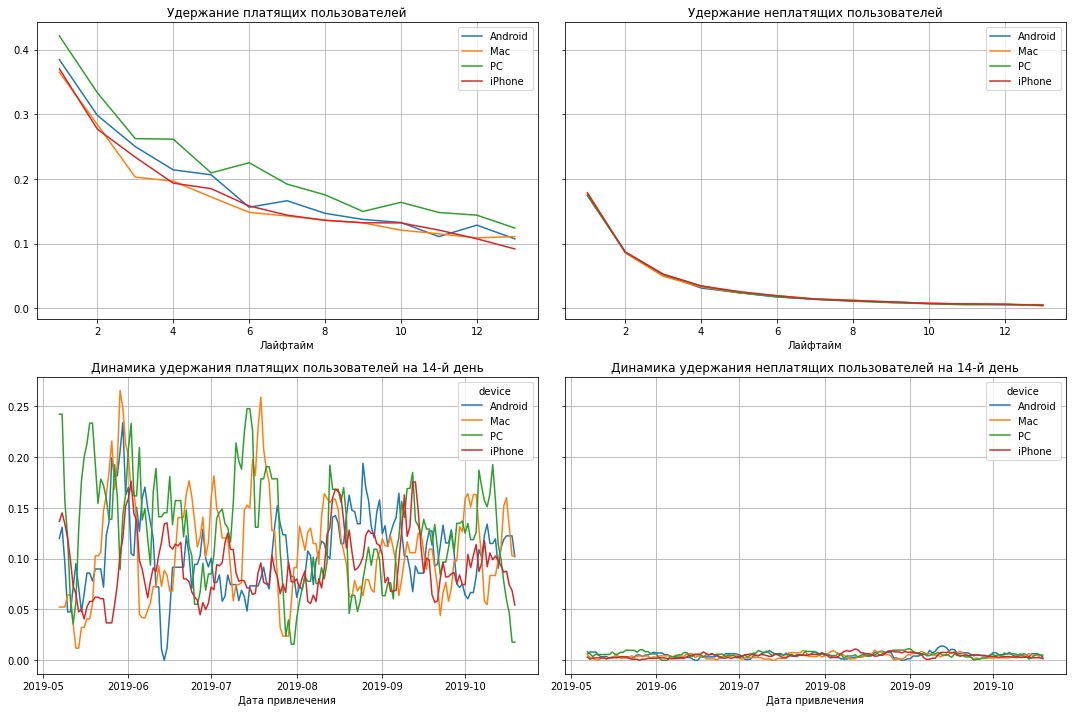

In [26]:
# Считаем удержание
retention_raw, retention, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_retention(retention, retention_history, horizon_days) 

Из графиков следует, что:

* Реклама окупается только на PC. ROI iPhone и Mac занимают самые низкие позиции и после двух недель держится на уровне 60% по сравнению с ~80% у PC и Android.
* CAC растет, особенно это выраженно у iPhone и Mac.
* LTV достаточно стабилен.
* Лучше всего конвертируются пользователи iPhone и Mac. Самая плохая конверсия у PC.
* Удержание пользователей с разбивкой по устройствам приблизительно одинаковое, нет ярко выраженных фаворитов или аутсайдеров.

### Анализ окупаемости рекламы с разбивкой по странам

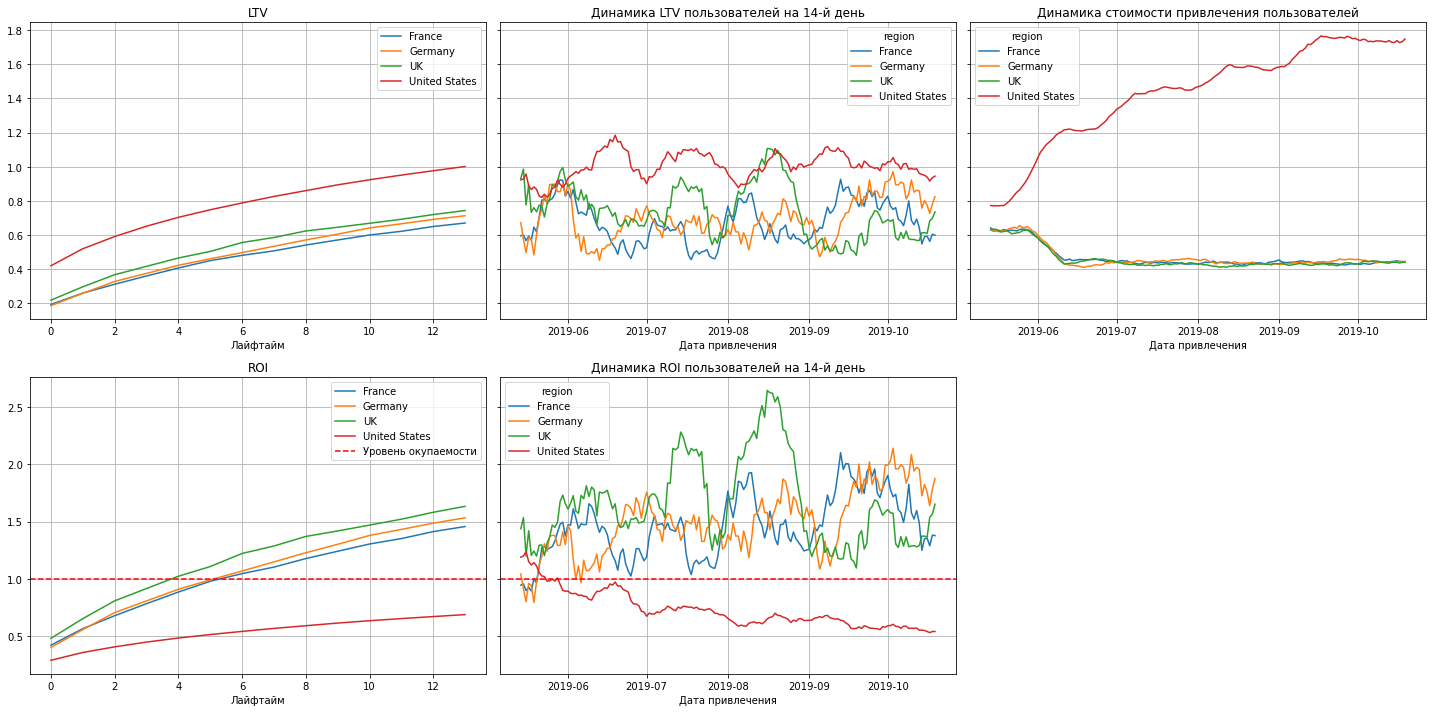

In [27]:
# Задаем условие разбивки
dimensions = ['region']

# Считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

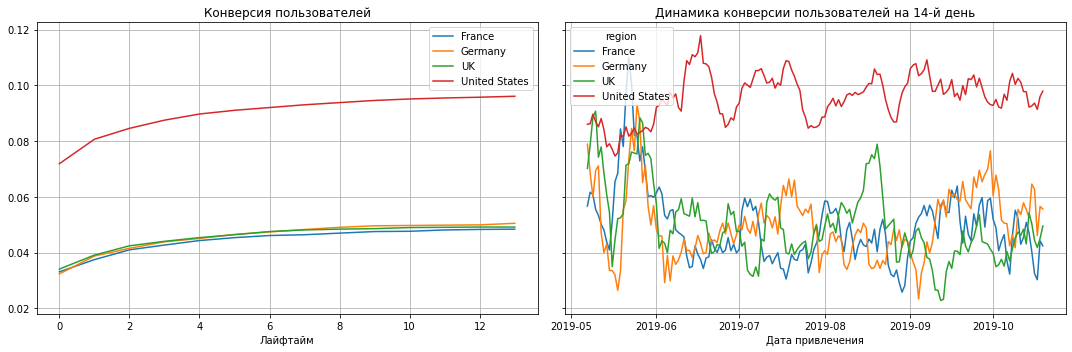

In [28]:
# Счиаем конферсию
conversion_raw, conversion, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_conversion(conversion, conversion_history, horizon_days)

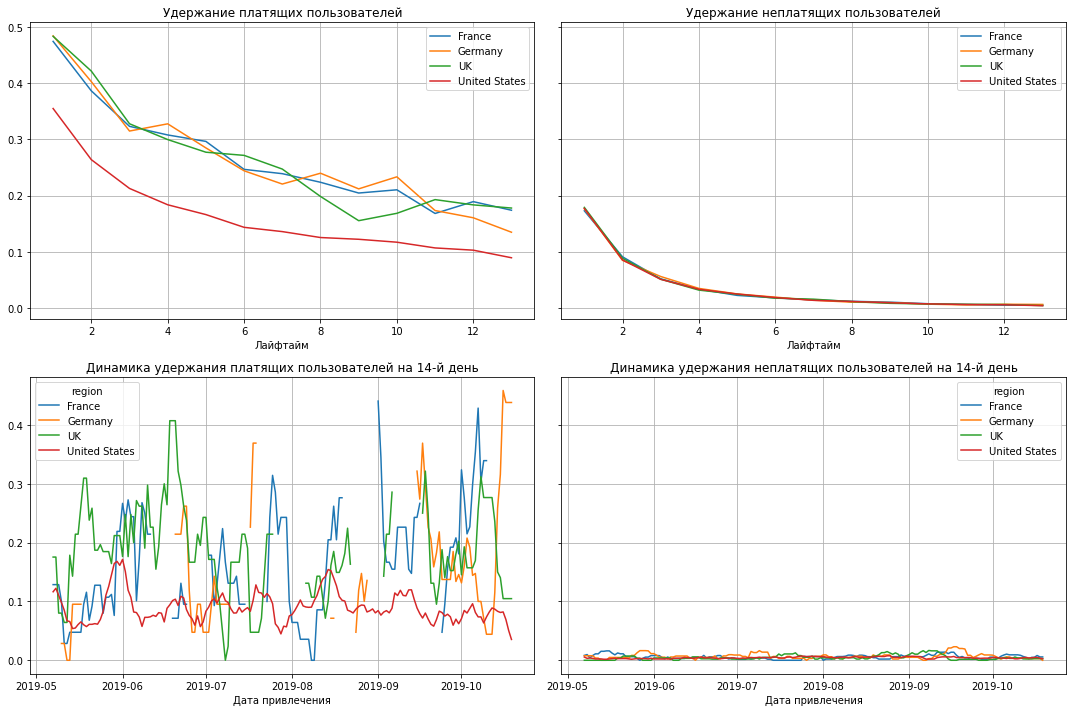

In [29]:
# Считаем удержание
retention_raw, retention, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_retention(retention, retention_history, horizon_days) 

Из графиков следует, что:

* Реклама не окупается только в Соединеных Штатах. После двух недель ROI имеет показатель около 50%.
* CAC в США растет с стремительной скорость, когда стоимость привлечения в Европейских странах стабильна за долгий период.
* LTV достаточно стабилен.
* Лучше всего конвертируются пользователи из Соединенных Штатов. Конверсия пользователей из стран ЕС на одном уровне.
* Пользователи из Соединеных Штатов очень плохо удерживаются.

Исходя из этих данных следует, что проблема в окупаемости рекламы скорее всего кроется в американском регионе.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

Сначала посмотрим окупаемость рекламы по всем регионам, а позже отдельно для США. Ведь мы уже сделали вывод, что скорее всего проблема в этом регионе.

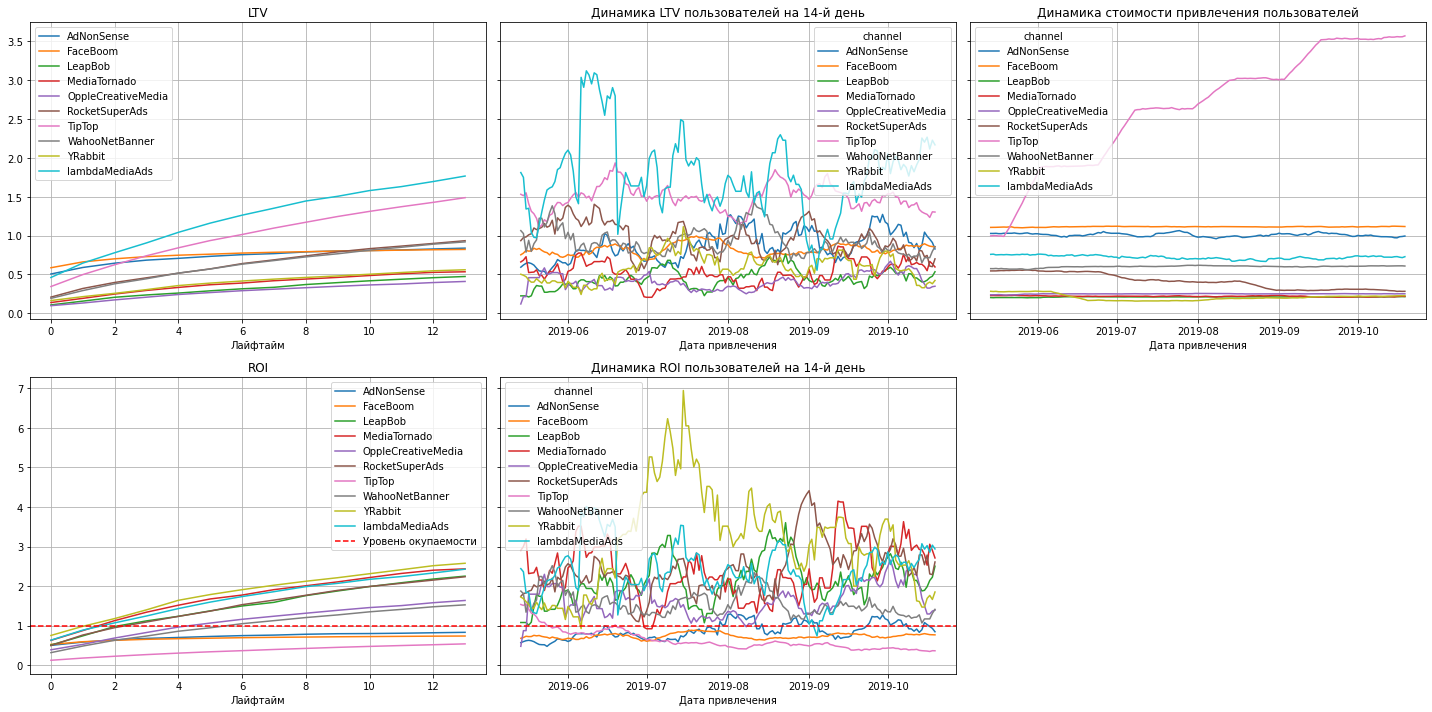

In [30]:
# Задаем условие разбивки
dimensions = ['channel']

# Считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

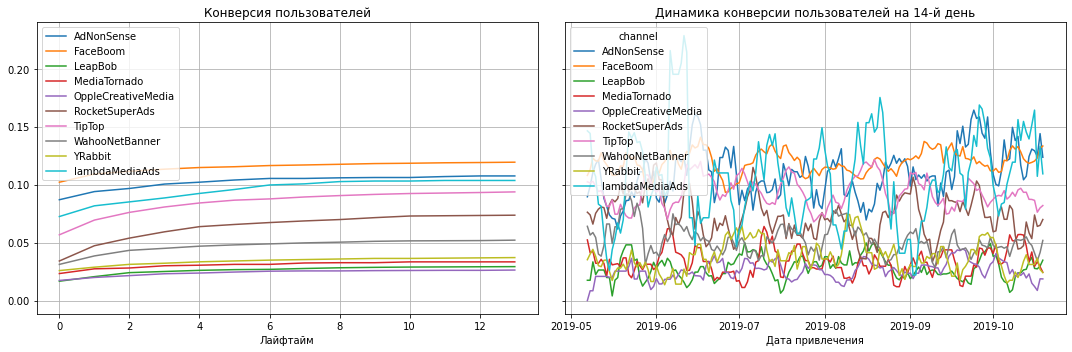

In [31]:
# Счиаем конферсию
conversion_raw, conversion, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_conversion(conversion, conversion_history, horizon_days)

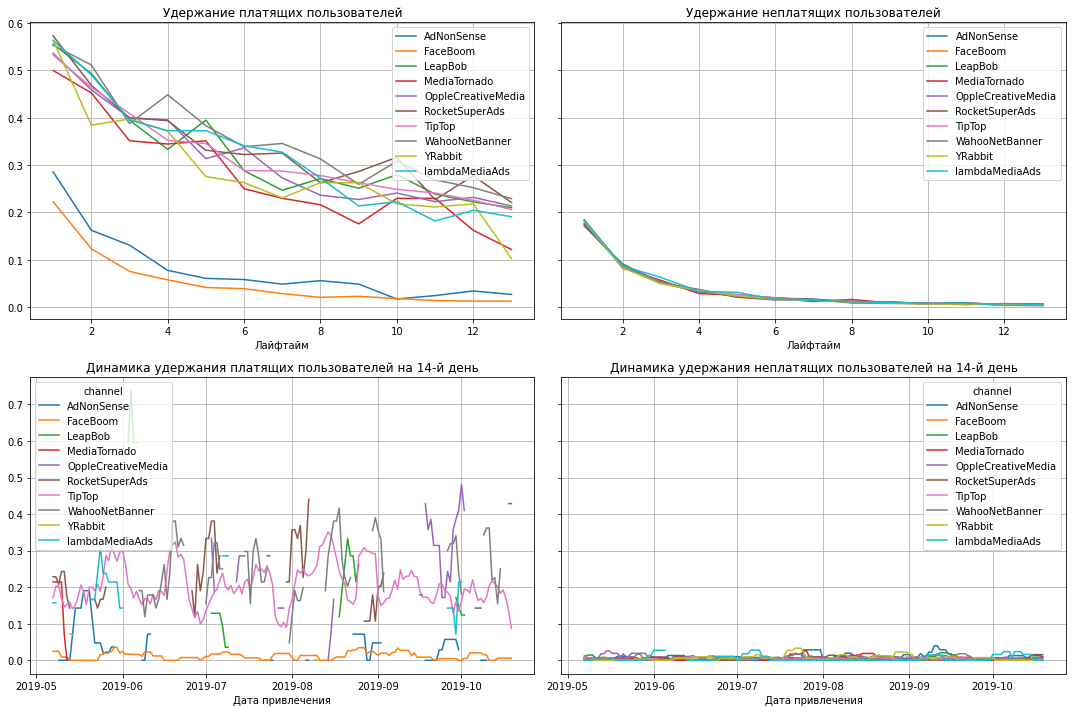

In [32]:
# Считаем удержание
retention_raw, retention, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_retention(retention, retention_history, horizon_days) 

Из графиков следует, что:

* Реклама не окупается через TipTop, FaceBoom, AdNonSense. 
* CAC через TipTop за время исследования вырос в 3,5 раза.
* LTV достаточно стабилен.
* Хорошая конверсия у TipTop, FaceBoom, AdNonSense, lambdaMediaAds.
* Пользователи FaceBoom и AdNonSense очень плохо удерживаются. MediaTornado и YRabbit смотрятся то же не убедительно. Хорошее удержание показывают lambdaMediaAds, TipTop, WahooNetBanner, RocketSuperAds, OppleCreativeMedia, LeapBob.

### Сравнение маркейтинговых метрик для пользователей США и ЕС

In [33]:
# Разбиваем данные на 2 региона
usa = profiles1[profiles1['region'] == 'United States']
eu = profiles1[profiles1['region'] != 'United States']

In [34]:
# Задаем условие разбивки - Усройства
dimensions = ['device']

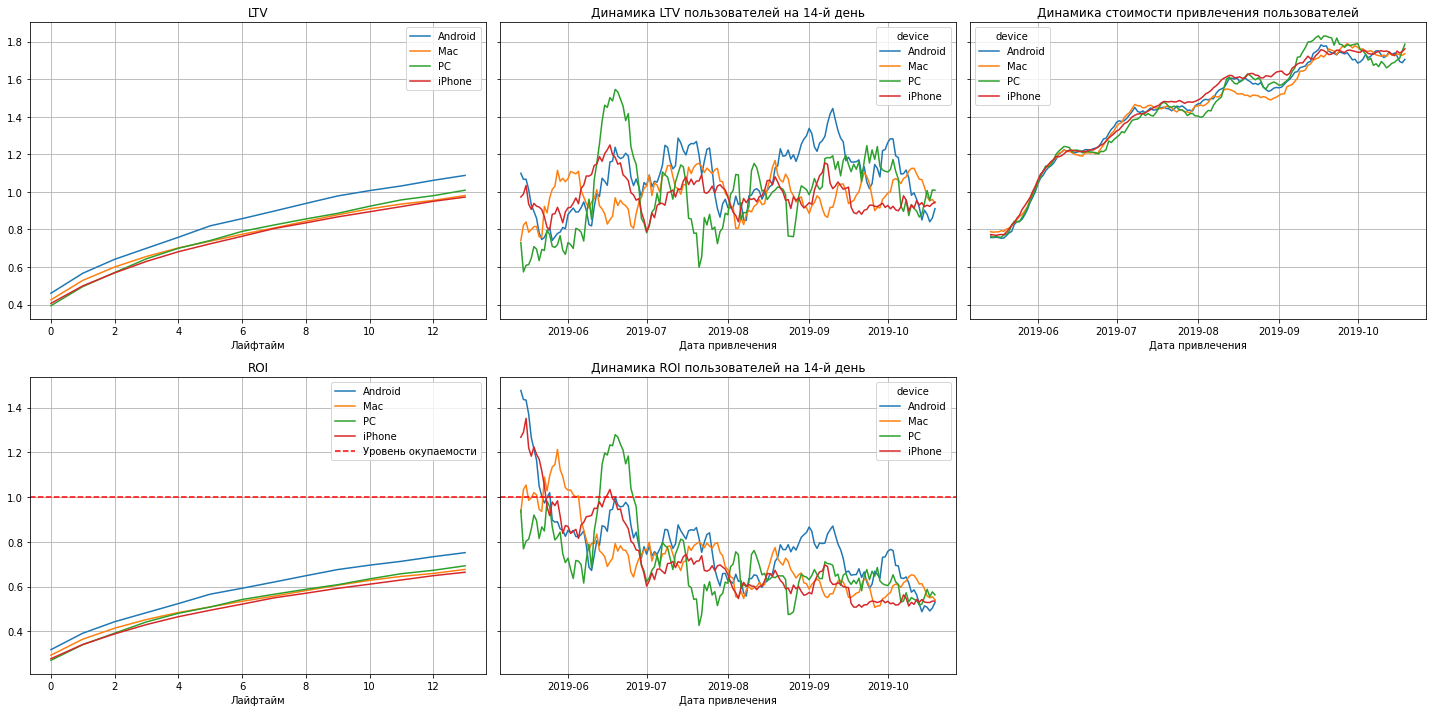

In [35]:
# USA
# Считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    usa, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

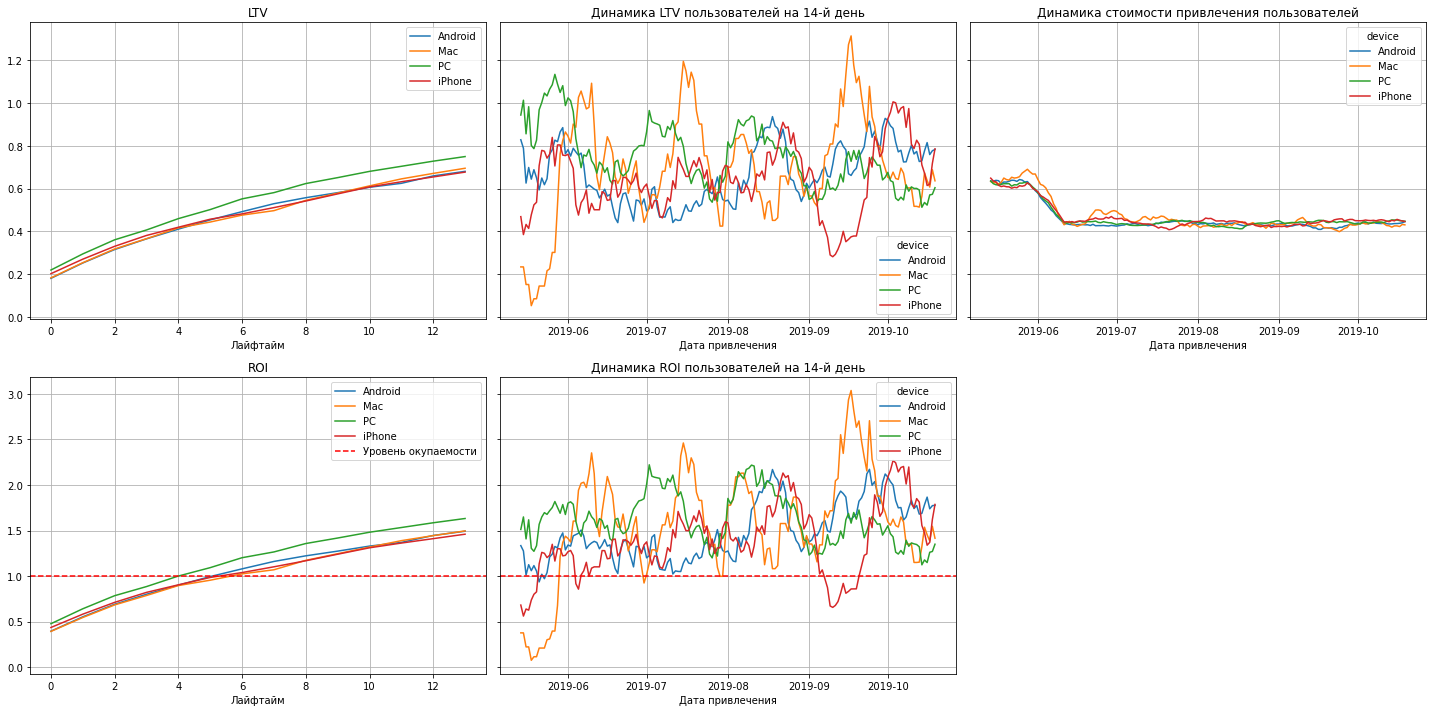

In [36]:
# EU
# Считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    eu, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

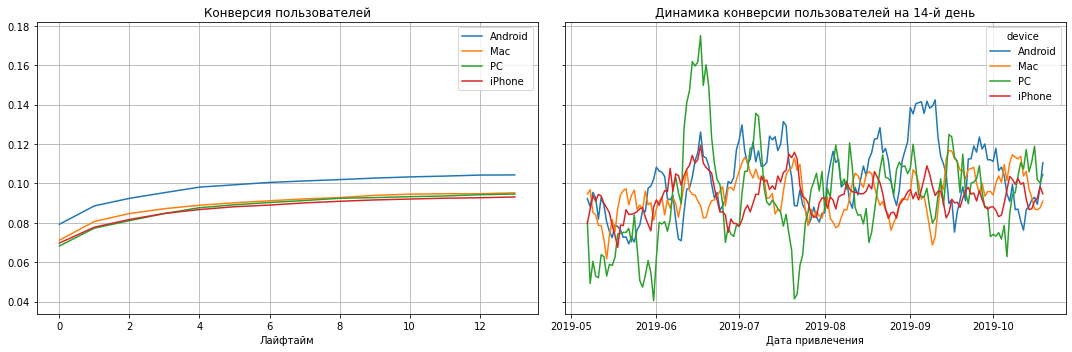

In [37]:
#USA
# Счиаем конферсию
conversion_raw, conversion, conversion_history = get_conversion(
    usa, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_conversion(conversion, conversion_history, horizon_days)

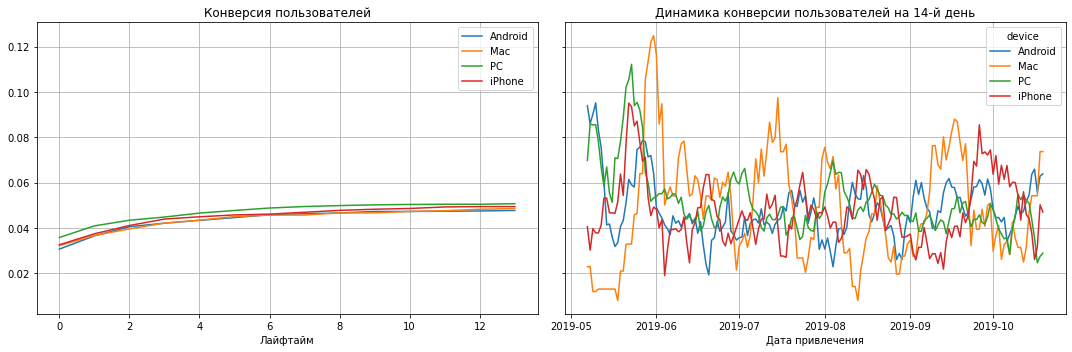

In [38]:
# EU
# Счиаем конферсию
conversion_raw, conversion, conversion_history = get_conversion(
    eu, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_conversion(conversion, conversion_history, horizon_days)

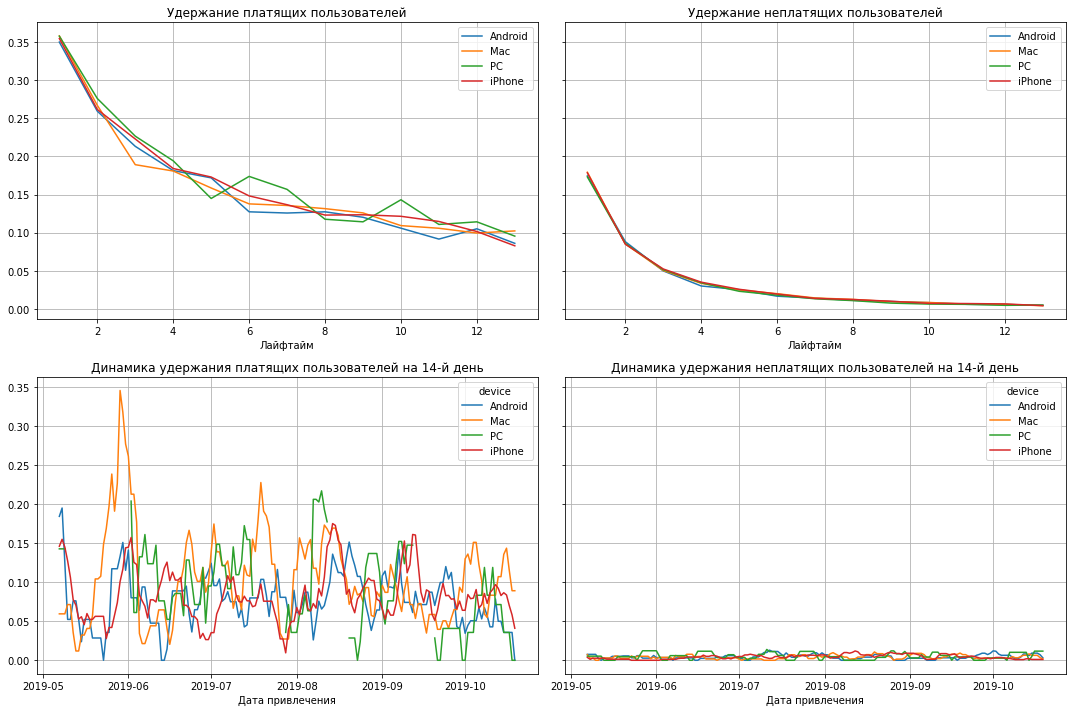

In [39]:
# USA
# Считаем удержание
retention_raw, retention, retention_history = get_retention(
    usa, visits, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_retention(retention, retention_history, horizon_days)

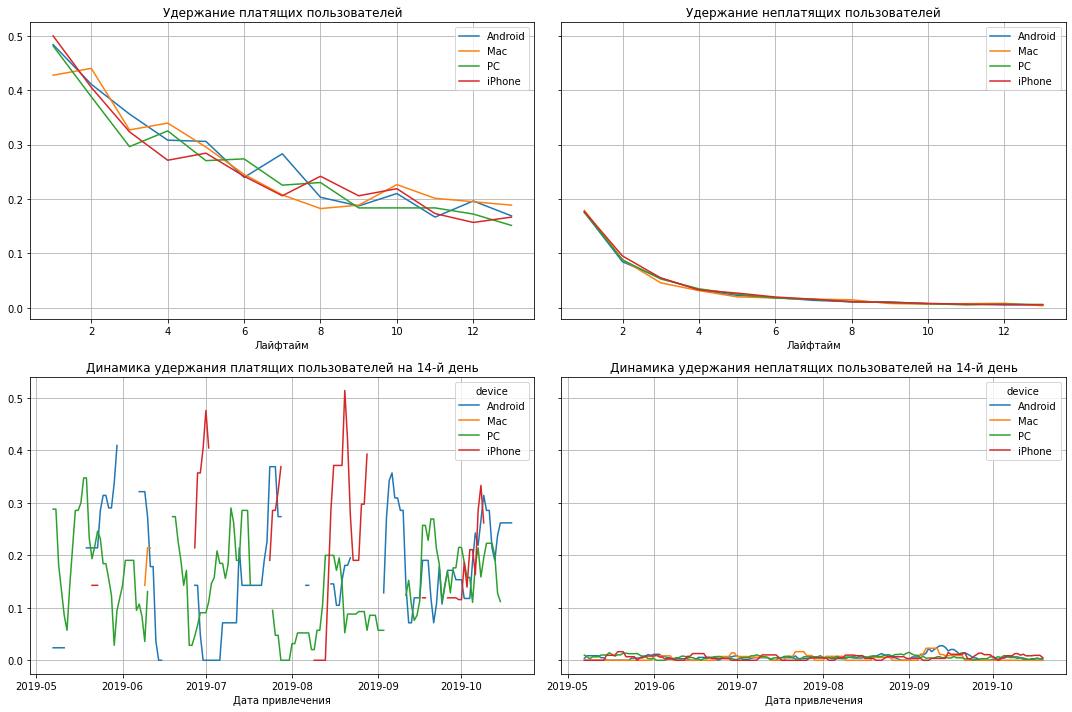

In [40]:
# EU
# Считаем удержание
retention_raw, retention, retention_history = get_retention(
    eu, visits, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_retention(retention, retention_history, horizon_days)

<b>Окупаемость рекламы никак не зависит от устройства пользователя, ведь результаты в двух регионах крайне противоположны:</b>
* В США реклама полностью не окупается, CAC постоянно растет.
* В ЕС реклама окупается на любом устройстве, при этом CAC даже уменьшился.

Значит можно сделать вывод, что проблема кроется в каналах привличения или в качестве пользователей привлекаемых из США.

In [41]:
# Задаем условие разбивки - Усройства
dimensions = ['channel']

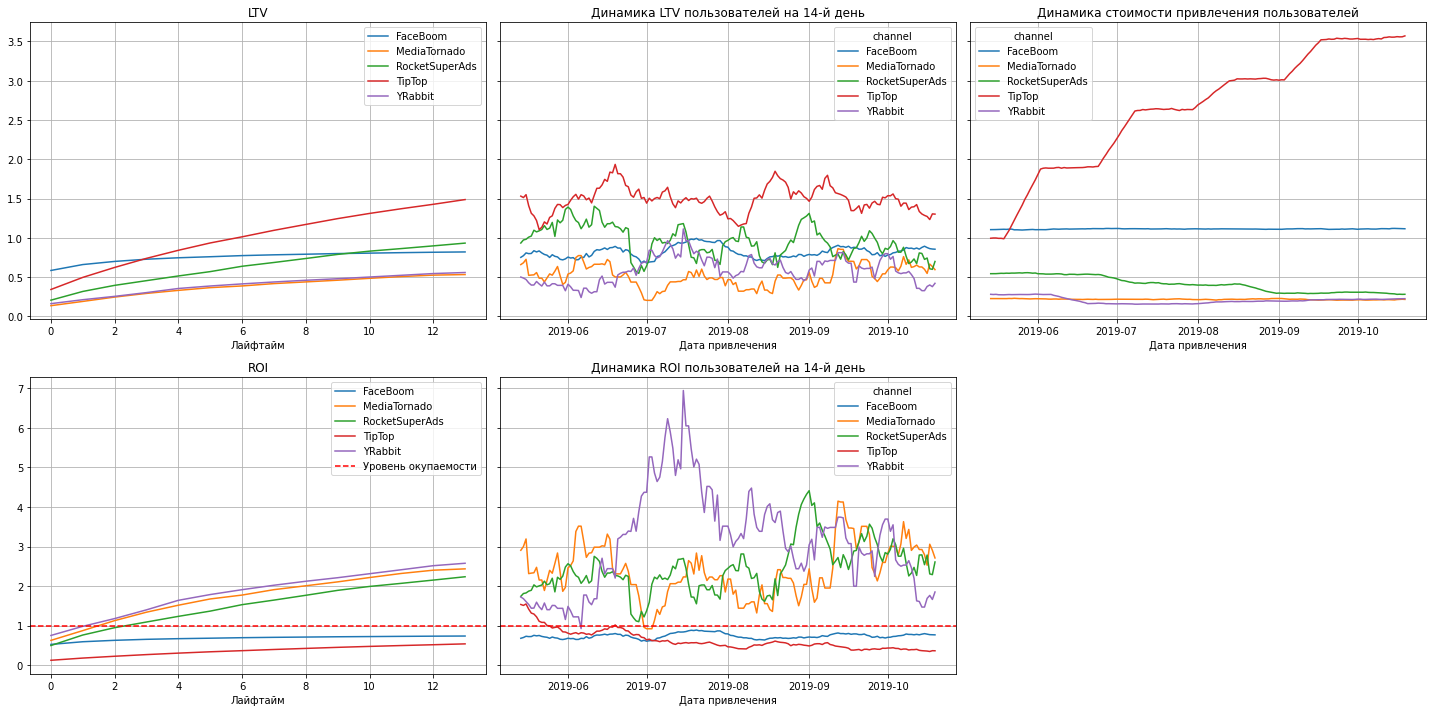

In [42]:
# USA
# Считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    usa, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

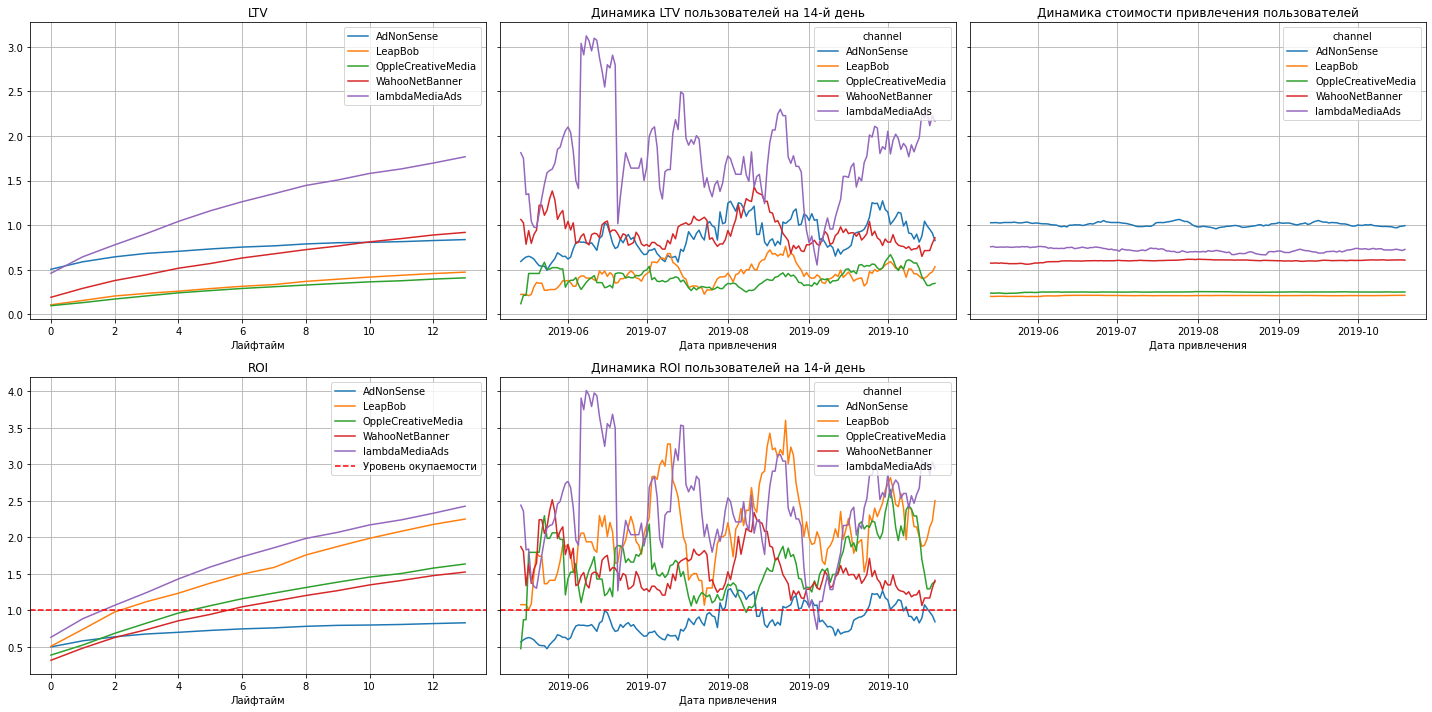

In [43]:
# EU
# Считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    eu, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

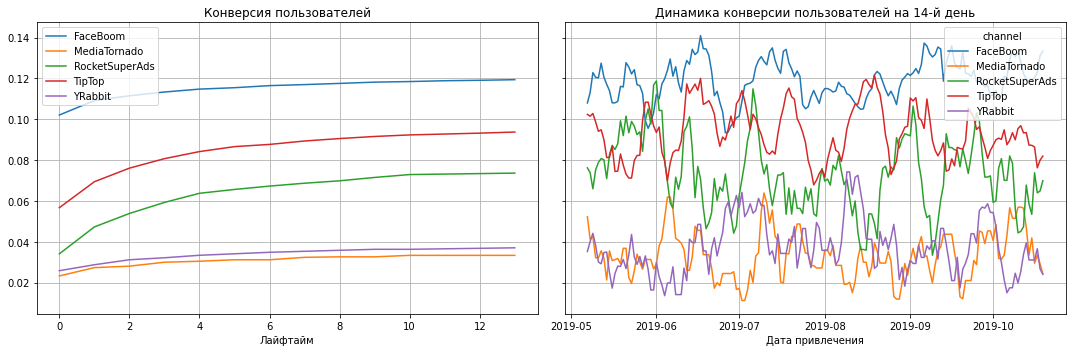

In [44]:
# USA
# Счиаем конферсию
conversion_raw, conversion, conversion_history = get_conversion(
    usa, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_conversion(conversion, conversion_history, horizon_days)

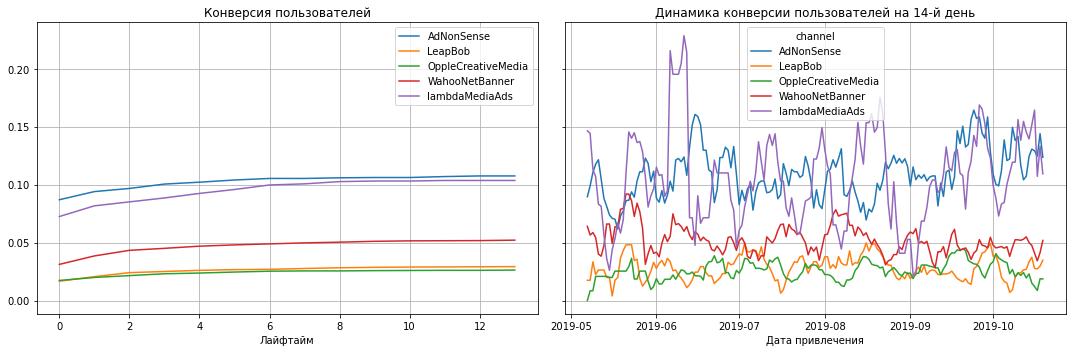

In [45]:
# EU
# Счиаем конферсию
conversion_raw, conversion, conversion_history = get_conversion(
    eu, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_conversion(conversion, conversion_history, horizon_days)

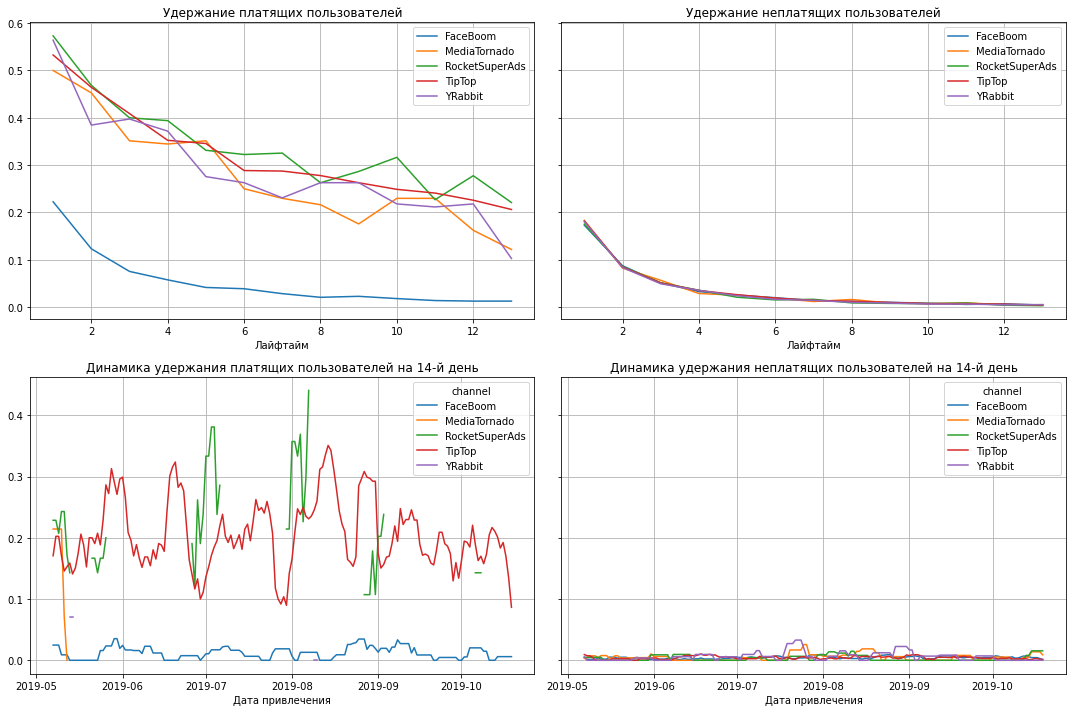

In [46]:
# USA
# Считаем удержание
retention_raw, retention, retention_history = get_retention(
    usa, visits, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_retention(retention, retention_history, horizon_days)

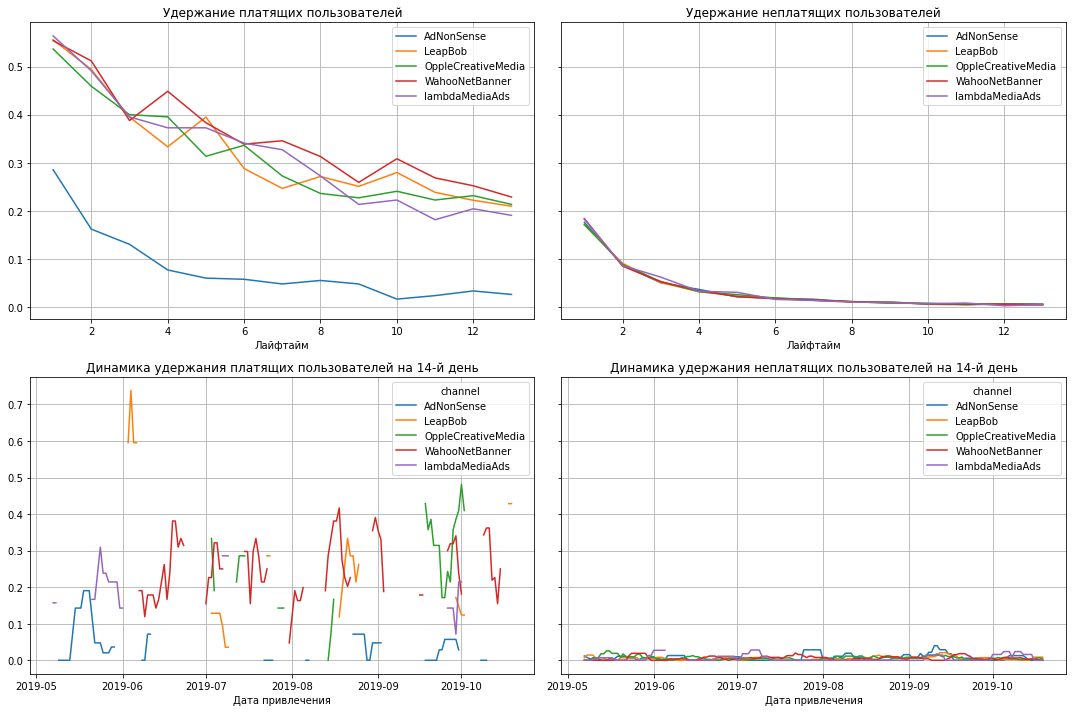

In [47]:
# EU
# Считаем удержание
retention_raw, retention, retention_history = get_retention(
    eu, visits, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики
plot_retention(retention, retention_history, horizon_days)

Из графиков следует, что:

* В США реклама не окупается через TipTop и FaceBoom. Хуже всего смотрится TipTop у которого после двух недель ROI порядка 50%.<br/>
В ЕС проблемы у AdNonSense. Единственный неокупаемый канал в Европе.
* CAC через TipTop растет от месяца к месяцу и на три порядка выше других источников. САС из Соединенных Штатов видно, что коррелируется с стоимостью привлечения через TipTop. Стоимость привлечения через FaceBoom высокая, но стабильная на протяжении долгого времени.<br/>
CAC в ЕС стабилен на протяжении всего промежутка исследования. AdNonSense - самый дорогой (1 доллар). LeapBob и OppleCreativeMedia - самые дешевые (около 0,25 цента).
* В США FaceBoom и TipTop имеют лучшую конверсию. YRabbit и MediaTornado имеют очень плохую конверсию.<br/>
В ЕС лидеры по конверсии AdNonSense и lambdaMediaAds. LeapBob и OppleCreativeMedia - наихудшие.
* Удержание пользователей пришедших через FaceBoom и AdNonSense очень плохое и выбивается из общей картины.

<b>
    По всем данным можно с уверенностью сказать, что реклама не окупается. Проблема кроется в первую очередь в пользователях из Соединенных Штатов, которые привлекаются через TipTop и FaceBoom. Рынок Соединенных Штатов имеет самых платежеспособных пользователей, но привлекаются пользователи "низкого качества" и за большие деньги. Необходима корректировка маркейтинговой стратегии. А так же можно с уверенностью сказать, что окупаемость рекламы никак не зависит от устройств которыми пользуются пользователи.
</b>

## Выводы
<b>Причины неэффективности маркейтинга:</b>
* Плохое распределение затрат по каналам привлечения. Порядка 82% всех трат приходятся на TipTop и FaceBoom.
* Слишком высокая стоимость привлечения одного пользователя через TipTop (около 3.5 доллара при средней цене 1.1).
* Очень низкое качество привлекаемых пользователей из Соединеных Штатов, особенно привлекаемых через FaceBoom.
* Низкое качетво привлекаемых пользователей через AdNonSense в Европе.

<b>Рекомендации:</b>
* Необходимо рассмотреть возможность лучшей диверсификации по каналам привлечения.
* Отказаться от привлечения пользователей через TipTop, FaceBoom и AdNonSense. Реклама в первом случае выходит черезмерно дорогой, во втором и третьем пользователи совершенно не удерживаются.
* Для привлечения пользователей из Соединенных Штатов делать упор на RocketSuperAds. Он имеет наилучшую конверсию, удержание, долю платящих пользователей и достаточно низкую стоимость их привлечения.
* Для привлечения пользоваелей из ЕС делать упор на lambdaMediaAds. Данный канал имеет наилучшие показатели конверсии, удержания, долю платящих пользователей и CAC в этом регионе.
* Если смена каналов привлечения в США не даст должного результата, то отказаться от продвижения приложения в данном регионе и сделать упор на Европу.
* Рассмотреть возможность выхода на быстрорастущий Азиатский рынок взамен США.